# Report:

## Introduction

## Import Packages

In [1]:
import os
# import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
from scipy.stats import pearsonr
from sqlalchemy import create_engine

# Method

### Datasource1: Vegetables: Yield and cultivated area per kind (type) of vegetable
* Metadata URL: https://opendata.cbs.nl/ODataApi/OData/37738ENG/$metadata#Cbs.OData.WebAPI.UntypedDataSet&$select=Vegetables,%20Periodes,%20GrossYield_1 
* Data URL:  https://opendata.cbs.nl/statline/#/CBS/en/dataset/37738ENG/table
* CSV Downloadable URL: https://opendata.cbs.nl/CsvDownload/csv/37738ENG/TypedDataSet?dl=9ADD1
* Data Type: CSV


This dataset contains information about the harvest of vegetables in the european countryNetherlands.
It concerns the harvest of vegetables (total yield in million-kg) and the corresponding cropping area (in hectares).

Gross yield = The yield of vegetables, in million kg..

Cropping area = The total cropping area is basically equal to the sown area per year.

The vegetables are broken down as follows:
- strawberries
- leaf and stem vegetables: endive; asparagus; fennel; leeks; celery; lettuce (iceberg, leaf and other); spinach.
- mushrooms
- tuberous and root vegetables: bunched and washed carrots; celeriac; beetroot; radish; scorzonera; onions; winter carrots
- kinds of cabbage: cauliflower; kale; broccoli; Chinese cabbage; green cabbage; red cabbage; conical cabbage; sprouts; white cabbage
- legumes: peas; French beans; broad beans
- fruit eaten as vegetables: eggplant; courgette; cucumber; pepper; tomato
- other vegetables

### Datasource2: Environmental accounts; emissions to water 1995 to 2014
* Metadata URL: https://opendata.cbs.nl/ODataApi/OData/83605ENG/$metadata#Cbs.OData.WebAPI.UntypedDataSet&$select=OriginDestination,%20Periods,%20ChromicCompoundsLikeCr_4,%20CopperCompoundsLikeCu_5,%20MercuryCompoundsLikeHg_6,%20LeadCompoundsLikePb_7,%20NickelCompoundsLikeNi_8,%20ZincCompoundsLikeZn_9,%20TotalNutrientsInEquivalents_10,%20PhosphorusCompoundsLikeP_11 
* Data URL: https://opendata.cbs.nl/statline/#/CBS/en/dataset/83605ENG/table?ts=1698675109480
* CSV Downloadable URL: https://opendata.cbs.nl/CsvDownload/csv/83605ENG/TypedDataSet?dl=9ADCA  
* Data Type: CSV

This datset provided information about the origin of emissions to water of nutrients and heavy metals into water. These data are part of the environmental accounts. Direct emissions are emitted directly into the environment. Indirect emissions reach the environment in an indirect way. For example, discharges to the sewer system partly reach the surface water after treatment in wastewater treatment plants.

Factors like:
1- Total origin emissions on water
2- Agriculture, forestry and fishing
3- Industry (no construction), energy
4- Chemistry and pharmaceutical

A group of metals with a high atomic weight. This concerns, in particular, the metals with a high toxicity purpose, such as arsenic, cadmium, chromium, copper, mercury, nickel, lead and zinc.

# Load Data

### Read data from datasource

In [2]:
_database = '../data/data.sqlite'

In [3]:
# If database doesn't exist, run datapipeline to create it
if not os.path.exists(_database):
    subprocess.run(["python", "../project/pipeline.py"])

# Load data from database
engine = create_engine(f'sqlite:///{_database}')
connection = engine.connect()

df_vegetable = pd.read_sql_table('vegetable', connection,index_col='Vegetables')
df_water = pd.read_sql_table('water', connection, index_col='Origin')

## `1 - Vegetable Data`

In [4]:
# df_vegetable.reset_index()

In [5]:
# df_vegetable

In [6]:
# # Method 1 (works):
# df_vegetable.loc[df_vegetable['year'] == 2010]

# # Method 2 (works):
# # df_vegetable[df_vegetable['year'] == 2010]

In [17]:
 df_vegetable.columns

Index(['year', 'gross_yield_million_kilogram'], dtype='object')

In [8]:
df_vegetable.index.name

'Vegetables'

In [9]:
df_vegetable.index.unique()

Index(['Onion/Garlic', 'Strawberry', 'Spinach', 'Belgian endive', 'Lettuce',
       'Iceberg', 'Tuberous', 'Radishes', 'Carrot', 'Cabbage', 'Legume',
       'Bean', 'Apple', 'Courgette'],
      dtype='object', name='Vegetables')

In [18]:
df_vegetable.year.unique()

array([1998, 2000, 2005, 2006, 2010, 2015, 2020, 2021, 2022], dtype=int64)

## Overall

In [10]:
# #  X-axis : Year (df_vegetable.year)
# #  Y-axis: Names of vegetables (df_vegetable.index)
# # df_vegetable.loc[df_vegetable.index == 'Onion/Garlic'
# plt.plot(df_vegetable.year, df_vegetable.index, 'o-')
# plt.title('New registrations of cars in germany (per year)')
# plt.legend(df_vegetable.columns)
# plt.show()

## 1.1 - Filter Data

## 1.1.1 - By year

In [94]:
df_vegetable["gross_yield_million_kilogram"] =  df_vegetable["gross_yield_million_kilogram"].str.replace(',','.')

AttributeError: Can only use .str accessor with string values!

In [95]:
# Sorting by column 'gross_yield_million_kilogram'
df_vegetable = df_vegetable.sort_values(by=['gross_yield_million_kilogram'], axis=0, ascending=True)

In [96]:
 df_vegetable["gross_yield_million_kilogram"] = df_vegetable.gross_yield_million_kilogram.astype(float)

In [97]:
df_vegetable.dtypes

year                              int64
gross_yield_million_kilogram    float64
dtype: object

In [98]:
# fixed_year_1998["gross_yield_million_kilogram"] = fixed_year_1998["gross_yield_million_kilogram"].str.replace(',','.')
# fixed_year_2000["gross_yield_million_kilogram"] = fixed_year_2000["gross_yield_million_kilogram"].str.replace(',','.')
# fixed_year_2005["gross_yield_million_kilogram"] = fixed_year_2005["gross_yield_million_kilogram"].str.replace(',','.')
# fixed_year_2006["gross_yield_million_kilogram"] = fixed_year_2006["gross_yield_million_kilogram"].str.replace(',','.')
# fixed_year_2010["gross_yield_million_kilogram"] = fixed_year_2010["gross_yield_million_kilogram"].str.replace(',','.')
# fixed_year_2015["gross_yield_million_kilogram"] = fixed_year_2015["gross_yield_million_kilogram"].str.replace(',','.')
# fixed_year_2020["gross_yield_million_kilogram"] = fixed_year_2020["gross_yield_million_kilogram"].str.replace(',','.')
# fixed_year_2021["gross_yield_million_kilogram"] = fixed_year_2021["gross_yield_million_kilogram"].str.replace(',','.')
# # fixed_year_2022["gross_yield_million_kilogram"] = fixed_year_2022["gross_yield_million_kilogram"].str.replace(',','.')

In [99]:
# # Method 1 (works): Select subset from dataframe
fixed_year_1998 = df_vegetable.loc[df_vegetable['year'] == 1998]
fixed_year_2000 = df_vegetable.loc[df_vegetable['year'] == 2000]
fixed_year_2005 = df_vegetable.loc[df_vegetable['year'] == 2005]
fixed_year_2006 = df_vegetable.loc[df_vegetable['year'] == 2006]
fixed_year_2010 = df_vegetable.loc[df_vegetable['year'] == 2010]
fixed_year_2015 = df_vegetable.loc[df_vegetable['year'] == 2015]
fixed_year_2020 = df_vegetable.loc[df_vegetable['year'] == 2020]
fixed_year_2021 = df_vegetable.loc[df_vegetable['year'] == 2021]
fixed_year_2022 = df_vegetable.loc[df_vegetable['year'] == 2022]

# # Method 2 (works):
# # df_vegetable[df_vegetable['year'] == 2010]

In [100]:
# Sorting by column 'gross_yield_million_kilogram'
# fixed_year = fixed_year.sort_values(by=['gross_yield_million_kilogram'], ascending=True)

## 1.1.2 - By Index

In [101]:
# Filter data
onion = df_vegetable.loc[df_vegetable.index == 'Onion/Garlic']
Strawberry = df_vegetable.loc[df_vegetable.index == 'Strawberry']
Spinach = df_vegetable.loc[df_vegetable.index == 'Spinach']
Belgian_endive = df_vegetable.loc[df_vegetable.index == 'Belgian endive']
Lettuce = df_vegetable.loc[df_vegetable.index == 'Lettuce']
Iceberg = df_vegetable.loc[df_vegetable.index == 'Iceberg']
Tuberous = df_vegetable.loc[df_vegetable.index == 'Tuberous']
Radishes = df_vegetable.loc[df_vegetable.index == 'Radishes']
Carrot = df_vegetable.loc[df_vegetable.index == 'Carrot']
Cabbage = df_vegetable.loc[df_vegetable.index == 'Cabbage']
Legume = df_vegetable.loc[df_vegetable.index == 'Legume']
Bean = df_vegetable.loc[df_vegetable.index == 'Bean']
Apple = df_vegetable.loc[df_vegetable.index == 'Apple']
Courgette = df_vegetable.loc[df_vegetable.index == 'Courgette']

## 1.2 Plotting

## 1.2.1 - Plot for all vegetables for a single fixed Year

### Year = 1998

In [107]:
# # Sorting by column 'gross_yield_million_kilogram'
# fixed_year_1998 = fixed_year_1998.sort_values(by=['gross_yield_million_kilogram'], axis=0, ascending=True)
# fixed_year_1998

,year,gross_yield_million_kilogram
Vegetables,,
Courgette,1998,11.0
Lettuce,1998,31.0
Strawberry,1998,35.9
Radishes,1998,45.0
Iceberg,1998,55.0
Belgian endive,1998,60.0
Bean,1998,69.0
Carrot,1998,104.0
Legume,1998,106.1


<function matplotlib.pyplot.show(close=None, block=None)>

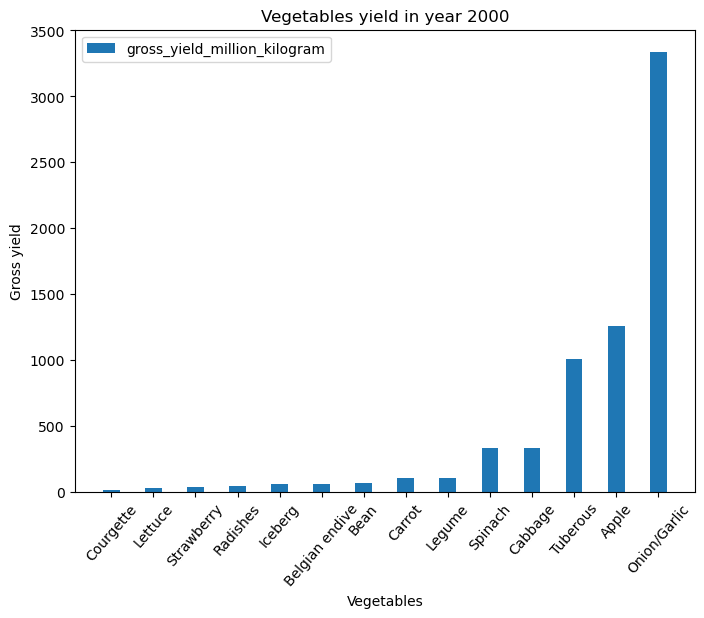

In [106]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 1, 1)

# X-axis: Names of vegetables (yearly.index)
# Values: Yield in kilograms (yearly.gross_yield_million_kilogram)
# Y-axis: Yield in kilograms (yearly.gross_yield_million_kilogram)
plt.bar(fixed_year_1998.index, fixed_year_1998.gross_yield_million_kilogram,  0.4, label='gross_yield_million_kilogram')
plt.legend()
plt.title('Vegetables yield in year 2000')
plt.ylabel('Gross yield')
plt.xlabel('Vegetables')
plt.xticks(rotation=49)
# plt.xticks(yearly.year)
# plt.xticks(df_water.Year.unique())
plt.show

### Year = 2000

In [109]:
fixed_year_2000

,year,gross_yield_million_kilogram
Vegetables,,
Courgette,2000,11.0
Lettuce,2000,22.0
Strawberry,2000,34.3
Radishes,2000,35.0
Iceberg,2000,50.0
Bean,2000,52.0
Belgian endive,2000,70.0
Legume,2000,93.0
Carrot,2000,132.0


<function matplotlib.pyplot.show(close=None, block=None)>

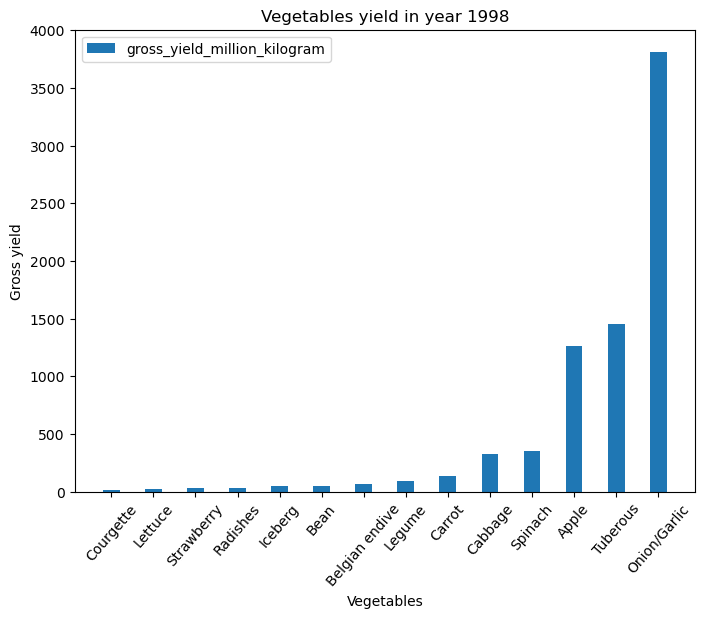

In [108]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 1, 1)

# X-axis: Names of vegetables (yearly.index)
# Values: Yield in kilograms (yearly.gross_yield_million_kilogram)
# Y-axis: Yield in kilograms (yearly.gross_yield_million_kilogram)
plt.bar(fixed_year_2000.index, fixed_year_2000.gross_yield_million_kilogram,  0.4, label='gross_yield_million_kilogram')
plt.legend()
plt.title('Vegetables yield in year 1998')
plt.ylabel('Gross yield')
plt.xlabel('Vegetables')
plt.xticks(rotation=49)
# plt.xticks(yearly.year)
# plt.xticks(df_water.Year.unique())
plt.show

## 1.2.2 - Plot of a single vegetable over the years

In [111]:
onion

,year,gross_yield_million_kilogram
Vegetables,,
Onion/Garlic,1998,3339.0
Onion/Garlic,2000,3814.8
Onion/Garlic,2006,4151.2
Onion/Garlic,2005,4255.0
Onion/Garlic,2010,4626.8
Onion/Garlic,2022,4959.3
Onion/Garlic,2015,5095.3
Onion/Garlic,2020,5460.2
Onion/Garlic,2021,5781.1


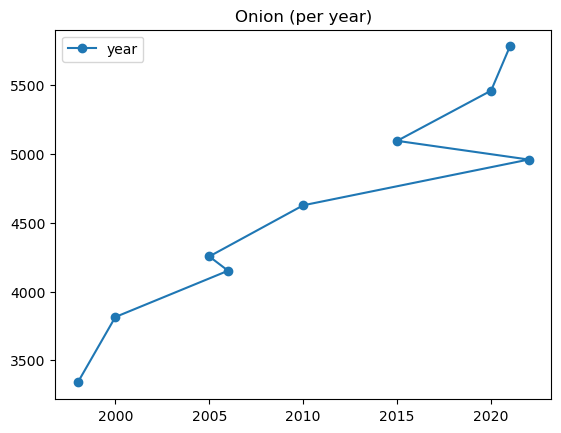

In [110]:
#  X-axis : Year (df_vegetable.year)
#  Y-axis: Names of vegetables (df_vegetable.index)

# plt.plot(df_vegetable.year, df_vegetable.index, 'o-')

plt.plot(onion.year, onion.gross_yield_million_kilogram, 'o-')
plt.title('Onion (per year)')
plt.legend(df_vegetable.columns)
plt.show()

In [116]:
# Sorting by column 'year'
Strawberry = Strawberry.sort_values(by=['year'], axis=0, ascending=True)

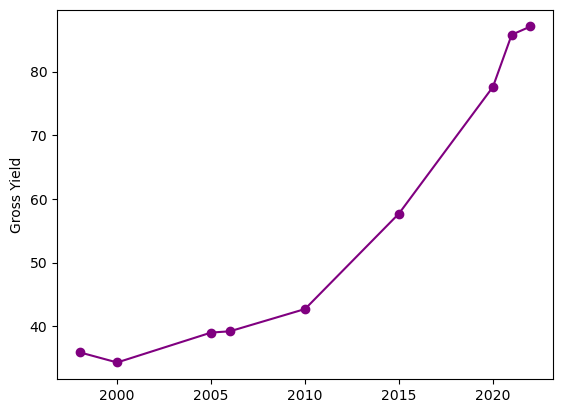

In [118]:
fig, ax1 = plt.subplots()

ax1.plot(Strawberry.year, Strawberry.gross_yield_million_kilogram, 'o-', color='purple')
ax1.set_ylabel('Gross Yield')
plt.show()

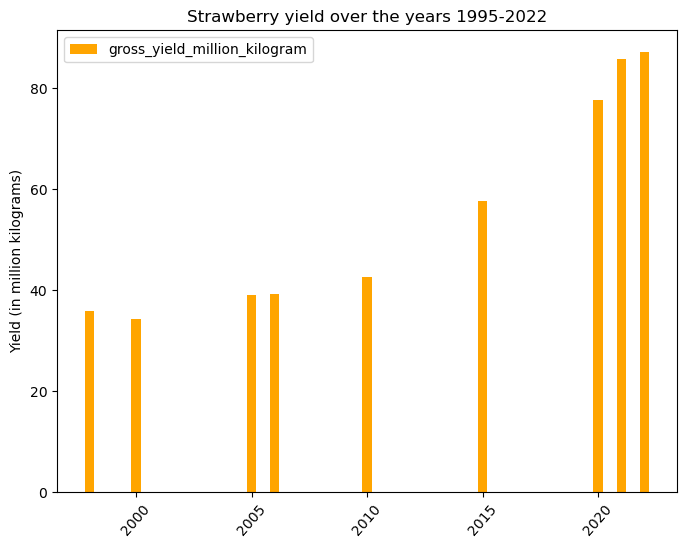

In [119]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 1, 1)

# X-axis: Years (Strawberry.year)
# Values: Yield in kilograms Strawberry.gross_yield_million_kilogram
# Y-axis: Yield in kilograms (Strawberry.gross_yield_million_kilogram
plt.bar(Strawberry.year, Strawberry.gross_yield_million_kilogram,  0.4, label='gross_yield_million_kilogram', color='orange')
plt.legend()
plt.title('Strawberry yield over the years 1995-2022')
plt.ylabel('Yield (in million kilograms)')
plt.xticks(rotation=49)
plt.show()

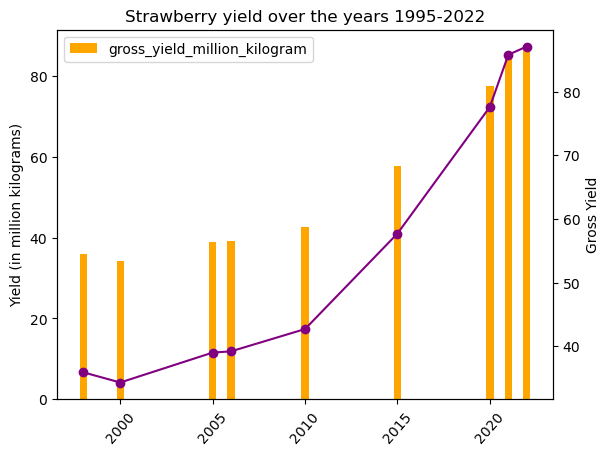

In [120]:
fig, ax1 = plt.subplots()

ax1.bar(Strawberry.year, Strawberry.gross_yield_million_kilogram,  0.4, label='gross_yield_million_kilogram', color='orange')
plt.legend()
plt.title('Strawberry yield over the years 1995-2022')
plt.ylabel('Yield (in million kilograms)')
plt.xticks(rotation=49)

ax2 = ax1.twinx()

ax2.plot(Strawberry.year, Strawberry.gross_yield_million_kilogram, 'o-', color='purple')
ax2.set_ylabel('Gross Yield')

# fig.tight_layout()
plt.show()

## 1.2.3 - Plot by index

In [ ]:
# TODO

## 1.2.4 - Plot for comparison over the year

In [ ]:
fig, ax1 = plt.subplots()

ax1.bar(Strawberry.year, Strawberry.gross_yield_million_kilogram,  0.4, label='Strawberry', color='orange')
ax1.bar(Apple.year+1, Apple.gross_yield_million_kilogram,  0.4, label='Apple', color='red')
plt.legend(['Strawberry', 'Apple'])
plt.title('Strawberry/Apple yield over the years 1995-2022')
plt.ylabel('Yield (in million kilograms)')
plt.xticks(rotation=49)

# ax2 = ax1.twinx()

# ax2.plot(Strawberry.year, pd.aveStrawberry.gross_yield_million_kilogram, 'o-', color='purple')
# ax2.set_ylabel('Gross Yield')

# fig.tight_layout()
plt.show()

## 2 - `Water Data`

## Confifgure 

In [ ]:
df_water = df_water.reset_index()

In [ ]:
df_water.columns

In [ ]:
# df_water = df_water.set_index(['Origin', 'Year'])

In [ ]:
df_water.index

In [ ]:
df_water.year.unique()

In [ ]:
df_water = df_water.dropna(axis=0)

In [ ]:
# df_water.index.name = "Origin"

In [ ]:
# df_water = df_water.reset_index()

In [ ]:
# df_water = df_water.dropna(axis=0)

## 2.1 - Filter data

## 2.1.1 - By year

In [ ]:
df_water[df_water['Year']==1995]

In [ ]:
df_water[df_water['Year'] == 2000]

In [ ]:
df_water.loc[df_water['Year'] == 2014]

## 2.1.2 - By Column

In [ ]:
Chromium = df_water.loc[df_water.Chromium == 'Chromium']

In [ ]:
df_water.Chromium

## 2.1.3 - By Index

In [ ]:
df_water.index

In [ ]:
Industrial = df_water.loc[df_water.index == 'Industrial']

In [ ]:
Industrial

## 2.2 Plotting

In [ ]:
# plt.plot(df_water.year, df_water.index, 'o-')
# plt.title('New registrations of cars in germany (per year)')
# plt.legend(df_vegetable.columns)
# plt.show()

## 2.2.1 - By year

## 2.2.2 - By Column

## 2.2.3 - By Index

# Learning 

### Selecting the product of Electronic Type 

Syntax 1:

In case of string:

df.loc[df[‘column_name’] <operator> operand]


In case of integer/float: (no quotes)


df.loc[df[‘column_name’] <operator> operand]


Parameters:

df: represents data frame

cname: represents column name

condition: represents condition on which rows has to be selected

Example:

select_prod = df.loc[df['Type'] == 'Electronic'] 

df.loc[df['Price'] >= 25000] 


Syntax 2: 

data_fram[data_fram [ "year" ] == 2010]

In [ ]:
# df_water[df_water['Chromium'].isnull()]

In [ ]:
 # df_water.Year.unique()

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.subplot(1, 1, 1)

# plt.bar(X_axis-0.10, df_water.Chromium, 0.4, label='Chromium')
# plt.bar(X_axis-0.6, df_water.Copper, 0.4, label='Copper')
# # plt.bar(X_axis-0.3, df_water.Mercury, 0.4, label='Mercury')
# # plt.bar(X_axis-0.0, df_water.Lead, 0.4, label='Lead')
# # plt.bar(X_axis-0.5, df_water.Nickel, 0.4, label='Nickel')
# # plt.bar(X_axis+0.8, df_water.Zinc, 0.4, label='Zinc')
# # plt.bar(X_axis+0.12, df_water.Zinc, 0.4, label='OtherNutrients')
# # plt.bar(X_axis+0.14, df_water.Zinc, 0.4, label='Phosphorus')

# plt.legend()
# plt.title('ELements emission')
# plt.ylabel('Share')
# plt.xticks(X_axis)
# # plt.xticks(df_water.Year.unique())
